In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy as sp
from sklearn import neural_network
from sklearn import model_selection
from sklearn import preprocessing
from sklearn import decomposition

# Data selection
The dataset is filtered by the classes *metal*$ \cup$*punk* and *dance and electronica*, assigning 1 and 0 as their respective labels.

In [2]:
data = pd.read_csv('msd_genre_dataset.txt',header=9)
dataf = data[(data['%genre']=='metal') | (data['%genre']=='punk') | (data['%genre']=='dance and electronica')]
dataf = dataf.replace(to_replace='punk', value=True)
dataf = dataf.replace(to_replace='metal', value=True)
dataf = dataf.replace(to_replace='dance and electronica', value=False)
data.head()

,%genre,track_id,artist_name,title,loudness,tempo,time_signature,key,mode,duration,...,var_timbre3,var_timbre4,var_timbre5,var_timbre6,var_timbre7,var_timbre8,var_timbre9,var_timbre10,var_timbre11,var_timbre12
0,classic pop and rock,TRFCOOU128F427AEC0,Blue Oyster Cult,Mes Dames Sarat,-8.697,155.007,1,9,1,246.33424,...,1255.514569,580.030472,598.485223,575.337671,322.068603,321.726029,232.700609,186.805303,181.938688,151.508011
1,classic pop and rock,TRNJTPB128F427AE9F,Blue Oyster Cult,Screams,-10.659,148.462,1,4,0,189.80526,...,2007.653070,1043.474073,585.694981,564.013736,510.177022,400.200186,365.119588,238.099708,197.933757,251.577525
2,classic pop and rock,TRLFJHA128F427AEEA,Blue Oyster Cult,Dance The Night Away,-13.494,112.909,1,10,0,158.19710,...,1204.856777,2736.520024,730.233239,665.203452,535.775111,439.335059,486.822970,265.333860,447.097987,251.880724
3,classic pop and rock,TRCQZAG128F427DB97,Blue Oyster Cult,Debbie Denise,-12.786,117.429,4,7,1,250.22649,...,809.755802,563.908070,492.803819,378.382799,372.875044,231.941957,246.313305,168.400152,85.282462,339.897173
4,classic pop and rock,TRNXMNM128F427DB8C,Blue Oyster Cult,(Don't Fear) The Reaper,-14.093,141.536,4,9,0,307.06893,...,1093.684935,343.556047,889.163314,218.111796,304.862864,178.352161,440.478867,142.669283,81.061326,208.355152


# Features
It is easy to see that there are 30 quantitative features to in the dataset, so these are the ones used for the analysis.

In [3]:
X = dataf[dataf.keys()[4:]]
Y = dataf['%genre']

# The approach
A single hidden layer perceptron will be used, and it will be trained with the whole standardised dataset to allow for a simple implementation of stochastic gradient descent is accordance to the methods learned in class.

The number of neurons used in the model will be adjusted sequentially to determine the optimal number of neurons of the model, for different activation functions, such as the hyperbolic tangent and the logistic sigmoid function.

# Logistic sigmoid function
The logistic sigmoid function is fairly common for classification problems. The performance for the increasing numbers of neurons will be evaluated, by using different error criterions such as accuracy of the classifier on the training and testing datasets and cross validation.

# Plain old accuracy
In this case, the accuracy is estimated on a training dataset and a validation dataset. For a big enough amount of testing data, the estimated real error is close to its true value, however, choosing the best classifier based on this criterion alone, makes said classifier dependent on the testing data.

In [4]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=0.2)
scaler=preprocessing.StandardScaler().fit(X_train)
X_trains=scaler.transform(X_train)
X_tests=scaler.transform(X_test)
scores_train = np.zeros(100)
scores_test = np.zeros(100)
for i in range(2,202,2):
    neurc = neural_network.MLPClassifier(hidden_layer_sizes=(i,), activation='logistic', solver='sgd', max_iter=1000)
    neurc.fit(X_trains, Y_train)
    scores_train[int(i/2-1)] = neurc.score(X_trains, Y_train)
    scores_test[int(i/2-1)] = neurc.score(X_tests, Y_test)

# Goodness of classification
The goodness of the classification is evaluated by measuring the mean accuracy of the classifier in the test samples, and comparing it to the training samples to annalize the error and the overfitting of the model.

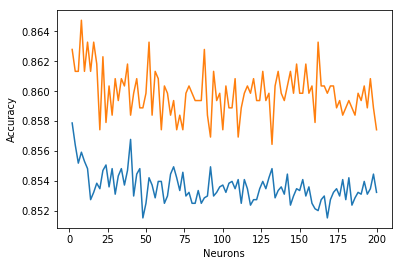

In [5]:
import matplotlib.pyplot as plt
plt.plot(range(2,202,2), scores_train)
plt.plot(range(2,202,2), scores_test)
plt.xlabel('Neurons')
plt.ylabel('Accuracy')

It is observed that there is little difference among the number of neurons used, which would imply that a simple logostic regression would do just fine in comparison with the perceptron with the sigmoid logistic function.

It is also possible to see that accuracy seems to decrease slightly with the number of neurons, which means the increased complexity of the model may not be worth all the trouble.

In addition to this, it is worth noting that there is little variation among different numbers of neurons, so the test is not clonclusive.

# Cross validation
It is thought that in certain cases it offers a better approach to the real classification error by reducing the variance, however one problem that it presents is that the estimated errors used to compute the averafe error, are not independent so the resulted average may have a different meaning., and it is not so easy to find a bound in this case.

In order to ensure that the classifier does not depend on the data a testing set of 2048 samples will be reserved and won't be used during the exploration to find the optimal number of neurons.

For cross validation the training data will be split randomly in 10 bins and one of them will be seclected to compute a total of 10 errors per iteration which will be averaged to give the score.

In [6]:
scores = np.zeros(100)
for i in range(2,202,2):
    neurc = neural_network.MLPClassifier(hidden_layer_sizes=(i,), activation='logistic', solver='sgd', max_iter=1000)
    scores[int(i/2-1)] = np.mean(np.array(model_selection.cross_val_score(neurc, X_train, Y_train, cv=10)))

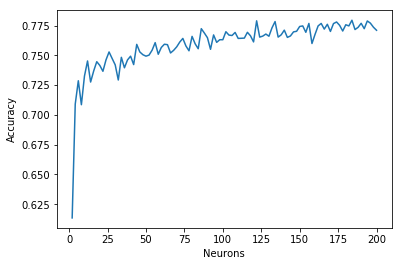

In [7]:
plt.plot(range(2,202,2), scores)
plt.xlabel('Neurons')
plt.ylabel('Accuracy')

In this case there is a clear tendency, that shows the best classifier is that with a greater number of neurons, and since this criterion does not depend on the dataset, it can be said with more certainty that the best classifier is that with 100 neurons wich gives an accuracy (on the training and testing samples) of:

In [8]:
neurc = neural_network.MLPClassifier(hidden_layer_sizes=(200,), activation='logistic', solver='sgd', max_iter=1000)
neurc.fit(X_trains, Y_train)
print('The mean accuracy on the training samples is: %f' %(neurc.score(X_trains, Y_train)))
print('The mean accuracy on the testing samples is: %f' %(neurc.score(X_tests, Y_test)))

The mean accuracy on the training samples is: 0.853236
The mean accuracy on the testing samples is: 0.861816


Which is pretty much the same as the one the one found with logistic regression, but with less overfitting.

# Hyperbolic tangent
It has already been established that the cross-validation error is a better criterion to determine the performance of the percetron, across different numbers of neuron, so this criterion will be used from now on.

In [9]:
scores = np.zeros(100)
for i in range(2,202,2):
    neurc = neural_network.MLPClassifier(hidden_layer_sizes=(i,), activation='tanh', solver='sgd', max_iter=1000)
    scores[int(i/2-1)] = np.mean(np.array(model_selection.cross_val_score(neurc, X_train, Y_train, cv=10)))

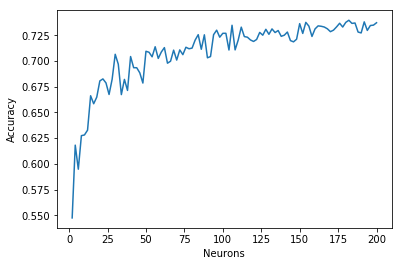

In [10]:
plt.plot(range(2,202,2), scores)
plt.xlabel('Neurons')
plt.ylabel('Accuracy')

This points towards and improved performance with a greater number of neurons, while being somewhat worse than using the logistic sigmoid function with classification accuracies of:

In [11]:
neurc = neural_network.MLPClassifier(hidden_layer_sizes=(200,), activation='tanh', solver='sgd', max_iter=1000)
neurc.fit(X_trains, Y_train)
print('The mean accuracy on the training samples is: %f' %(neurc.score(X_trains, Y_train)))
print('The mean accuracy on the testing samples is: %f' %(neurc.score(X_tests, Y_test)))

The mean accuracy on the training samples is: 0.859341
The mean accuracy on the testing samples is: 0.866699


The usual accuracy points towards the hyperbolic tangent being a better activation function, however it can be seen that there is a little bit of overfitting that was not present when the losgistic sigmoid function was used.

# The rectified linear function
This is the function used by default in SKlearn for this kind of problems, and is simply the ramp function yielding the results:

In [12]:
scores = np.zeros(100)
for i in range(2,202,2):
    neurc = neural_network.MLPClassifier(hidden_layer_sizes=(i,), solver='sgd', max_iter=1000)
    scores[int(i/2-1)] = np.mean(np.array(model_selection.cross_val_score(neurc, X_train, Y_train, cv=10)))

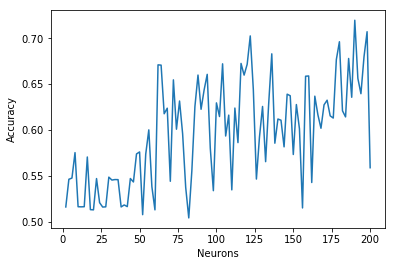

In [13]:
plt.plot(range(2,202,2), scores)
plt.xlabel('Neurons')
plt.ylabel('Accuracy')

The activation function in this case is less complex, but there seems to be a big compromise in terms of accuracy. There is no clear tendency and the accuracy seems to be significantly worse.

In the case of 200 neurons, the accuracy on the training and testing dataset take a value of:

In [14]:
neurc = neural_network.MLPClassifier(hidden_layer_sizes=(200,), solver='sgd', max_iter=1000)
neurc.fit(X_trains, Y_train)
print('The mean accuracy on the training samples is: %f' %(neurc.score(X_trains, Y_train)))
print('The mean accuracy on the testing samples is: %f' %(neurc.score(X_tests, Y_test)))

The mean accuracy on the training samples is: 0.896825
The mean accuracy on the testing samples is: 0.882812


In this case, it is worth it to take a second look to these accuracies along different numbers of neurons, as the amount of training samples might be too little for cross-validation.

In [15]:
scores_train = np.zeros(100)
scores_test = np.zeros(100)
for i in range(2,202,2):
    neurc = neural_network.MLPClassifier(hidden_layer_sizes=(i,), solver='sgd', max_iter=1000)
    neurc.fit(X_trains, Y_train)
    scores_train[int(i/2-1)] = neurc.score(X_trains, Y_train)
    scores_test[int(i/2-1)] = neurc.score(X_tests, Y_test)

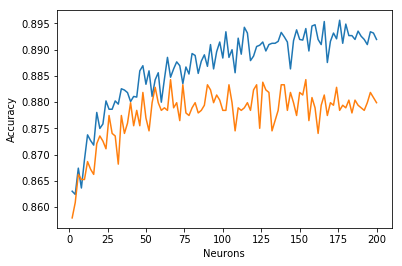

In [16]:
plt.plot(range(2,202,2), scores_train)
plt.plot(range(2,202,2), scores_test)
plt.xlabel('Neurons')
plt.ylabel('Accuracy')

There is a clear tendency for the accuracy and overfitting to increase with the number of neurons until they reach a stable value, so it is possible to say that the best classifier of the three is the one with 200 neurons and a rectified linear function.

# Analysis
A brief summary for the best accuracy found for the different methods is presented:

|Method|Sigmoid logistic function|Hyperbolic tangent|Rectified linear function|
|------|--------|--------|---|
|   Accuracy on testing set  |   0.8532  |      0.8593     | 0.8968 |
|  Accuracy on training set  |   0.8618  |      0.8667     | 0.8828 |

Using Chernoff's absolute error bounds it is possible to say, with a confidence of 95%, that:

$\epsilon=\sqrt{\frac{1}{2*2048}\frac{1}{\ln(\frac{1}{0.025})}}\approx 0.03$

Which means that with the current size of our testing batch (2048), it is possible to say that with a probability of 95%, our estimator for the real accuracy of the classifier does not differ in more than 3%.

# Conclussions
Accorrding to the found accuracies and the Chernoff bound, it is possible to say that the rectified linear function classifier with 200 neurons is significantly better than the other classifiers.

Given the amount of testing samples it is possible to say that our estimator for the real accuracy does not differ from the real accuracy in more than 3% with a confidence of 95%.

The number of testing samples and variability of the estimators with respect to the real value should be taken into account when choosing an adecuate error criterion.